<a href="https://colab.research.google.com/github/YonggunJung/AI2_Ploy/blob/main/22_House_Price(Kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 캐글 집값 예측
15장에서 했던 모델로 예측 해보기

In [3]:
kaggle_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Polytech/AI2/data/house prices/test.csv')
kaggle_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
kaggle_test = pd.get_dummies(kaggle_test)
kaggle_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,False,False,False,True,True,False,False,False,False,False
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,False,False,False,True,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,False,False,False,True,False,False,False,False,True,False


In [6]:
kaggle_test = kaggle_test.fillna(kaggle_test.mean())
kaggle_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,False,False,False,True,True,False,False,False,False,False
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,False,False,False,True,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,False,False,False,True,False,False,False,False,True,False


In [7]:
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 270 entries, Id to SaleCondition_Partial
dtypes: bool(233), float64(11), int64(26)
memory usage: 753.8 KB


In [8]:
# 학습에 사용된 열을 Ktest로 저장
cols_kaggle = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
Ktest = kaggle_test[cols_kaggle]
Ktest

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,5,896,1.0,730.0,882.0
1,6,1329,1.0,312.0,1329.0
2,5,1629,2.0,482.0,928.0
3,6,1604,2.0,470.0,926.0
4,8,1280,2.0,506.0,1280.0
...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0
1455,4,1092,1.0,286.0,546.0
1456,5,1224,2.0,576.0,1224.0
1457,5,970,0.0,0.0,912.0


In [9]:
from tensorflow.keras.models import load_model
# 모델 불러오기
model = load_model("/content/drive/MyDrive/Colab Notebooks/Polytech/AI2/data/house prices/Ch15-house.hdf5")

In [12]:
# ID와 예측 값이 들어갈 빈 리스트
ids = []
# Ktest 의 한 행씩 다 예측해서 1차원배열로 해준다.
ypred = model.predict(Ktest).flatten()
# 하나씩 ids로 넣어준다.
for i in range(len(Ktest)):
  id = kaggle_test['Id'][i]
  pred = ypred[i]
  ids.append([id, pred])

46/46 [==============================] - 0s 2ms/step


In [13]:
# 테스트 결과의 저장 환경 설정
# 중복 되지 않도록 현재 시간을 파일명에 사용
import time

timestr = time.strftime("%Y%m%d-%H%M%S")
filename = str(timestr)   # 파일명을 연월일-시분초로 지정
outdir = '/content/drive/MyDrive/Colab Notebooks/Polytech/AI2/data/house prices'   # 파일 저장 위치

In [14]:
# 앞서 만들어진 실행 번호와 예측 값을 새로운 데이터 프레음에 넣고
# 이를 csv파일로 저장

df = pd.DataFrame(ids, columns=["Id", "SalePrice"])
df.to_csv(str(outdir + filename + '.csv'), index=False)

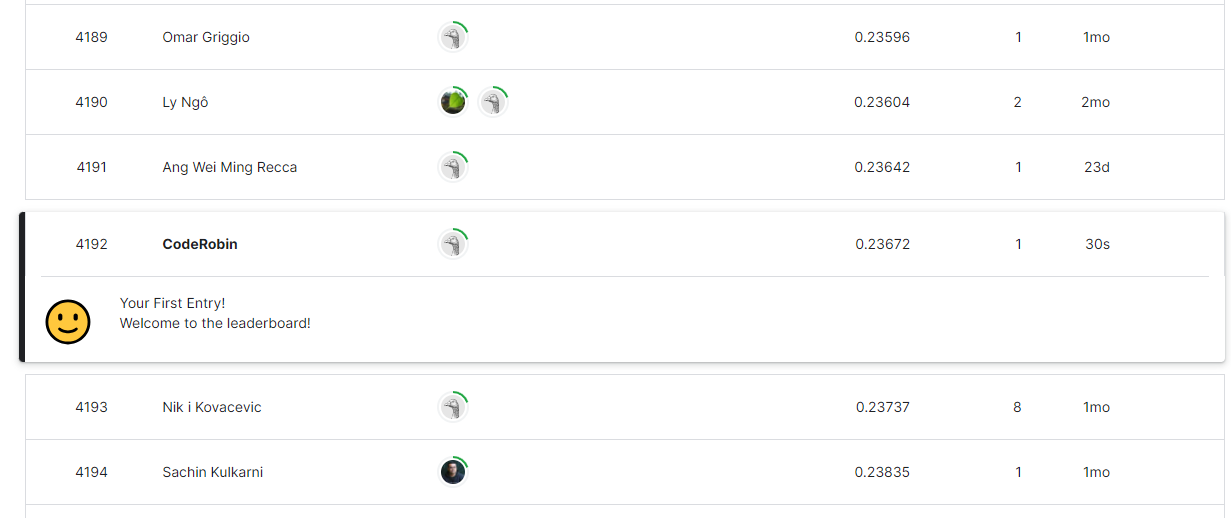

In [17]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Polytech/AI2/data/house prices/houseprice_kaggle.PNG')
cv2_imshow(img)